In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
from datetime import datetime, time
from datetime import timedelta

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect, func

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [11]:
#Get a list of column names and types for mesurement
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [12]:
columns = inspector.get_columns('measurement')
for col in columns:
    print(col['name'], col['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
columns = inspector.get_columns('Station')
for col in columns:
    print(col['name'], col['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
measurement_query = session.query( Measurement.date, Measurement.prcp).\
filter (Measurement.date >= '2016-08-23').\
order_by(Measurement.date).all()
measurement_df = pd.DataFrame(measurement_query)

measurement_df = measurement_df.rename(columns={'date': 'Date', 'prcp': 'Precipitation'})
measurement_df = measurement_df[measurement_df['Precipitation'].notna()]
measurement_df.set_index('Date', inplace = True)
measurement_df
#df = df[df['EPS'].notna()]
#measurement_df['Date'] =  pd.to_datetime(measurement_df['Date'], format='%Y-%m-%d')

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


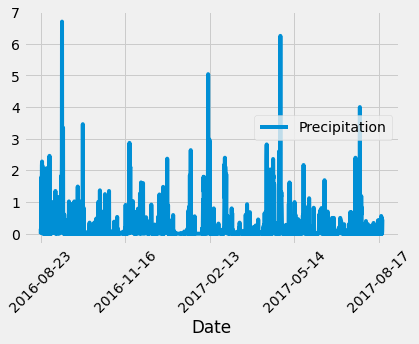

In [15]:

measurement_df
measurement_df.plot(rot=45)
plt.tight_layout
plt.show()
# dataFrame.plot.barh(x='Countries', y='Growth Rate', title="Growth rate of different countries");

#plt.show(block=True);

In [16]:
# Calculate the date 1 year ago from the last data point in the database


In [17]:
# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

In [18]:
# Use Pandas to calcualte the summary statistics for the precipitation data
measurement_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [19]:
# Design a query to show how many stations are available in this dataset?
total_stations = session.query(Station.id).count()
print("There are {} stations available".format(total_stations))

There are 9 stations available


In [20]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

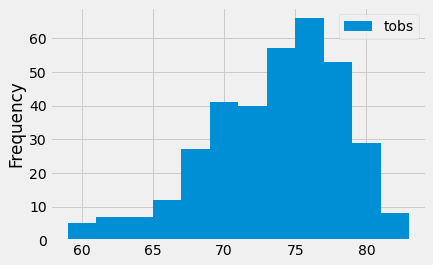

In [21]:
# Choose the station with the highest number of temperature observations.
tobs = session.query(Measurement.tobs).\
filter (Measurement.date >= '2016-08-23').\
filter(Measurement.station=='USC00519281').all()
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_df = pd.DataFrame(tobs)
tobs_df.plot.hist(bins=12, alpha=1)
plt.show()

In [22]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
session.query(Measurement.station, func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).first()

('USC00519281', 54.0, 85.0, 71.66378066378067)

## Bonus Challenge Assignment

In [23]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [24]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
def last_year_temp_analysis(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
#Trip dates: 8/1/2017-8/15/2017
print(calc_temps('2017-08-01', '2017-08-15'))

[(70.0, 78.8688524590164, 84.0)]


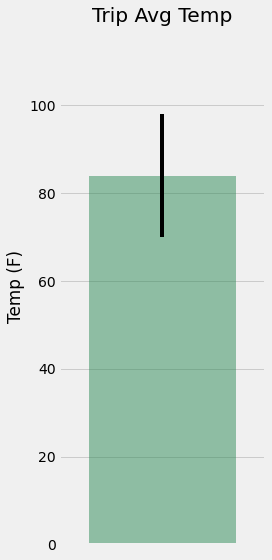

In [25]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
last_year_temp_analysis = calc_temps('2017-08-01', '2017-08-15')
TMIN = last_year_temp_analysis[0][0]
TAVE = last_year_temp_analysis[0][1]
TMAX = last_year_temp_analysis[0][2]
fig, ax = plt.subplots(figsize=plt.figaspect(2.))

bar= ax.bar(1, TMAX, yerr=(TMAX-TMIN),alpha=0.5, color="seagreen")
ax.set(xticks=range(1), xticklabels="a", title="Trip Avg Temp", ylabel = "Temp (F)")
ax.margins(.2,.2)
fig.tight_layout()

plt.savefig("Temperature_analysis.png")
plt.show()


In [26]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
trip_start_date ='2017-08-01'
trip_end_date = '2017-08-15'
sel = ([Station.station, 
        Station.name, 
        func.sum(Measurement.prcp), 
        Station.latitude, 
        Station.longitude, 
        Station.elevation
       ])

station_rain = (session.query(*sel)
                   .filter(Station.station == Measurement.station)
                   .filter(Measurement.date >= trip_start_date)
                   .filter(Measurement.date <= trip_end_date)
                   .group_by(Station.station)
                   .order_by(func.sum(Measurement.prcp).desc())
                   .all())
station_rain

[('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  1.7,
  21.3331,
  -157.8025,
  152.4),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  0.38,
  21.45167,
  -157.84888999999998,
  32.9),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  0.33,
  21.5213,
  -157.8374,
  7.0),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  0.14,
  21.33556,
  -157.71139,
  19.5),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 0.06, 21.2716, -157.8168, 3.0)]

In [27]:
station_rain_df = pd.DataFrame(station_rain, columns = ['Station', 'Location', ' Precipitation(inc) ', 'Latitude', 'Longitude', 
                                                              'Elevation'])

station_rain_df

,Station,Location,Precipitation(inc),Latitude,Longitude,Elevation
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",1.70,21.33310,-157.80250,152.4
1,USC00519281,"WAIHEE 837.5, HI US",0.38,21.45167,-157.84889,32.9
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",0.33,21.52130,-157.83740,7.0
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",0.14,21.33556,-157.71139,19.5
4,USC00519397,"WAIKIKI 717.2, HI US",0.06,21.27160,-157.81680,3.0


In [28]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [39]:
# push each tuple of calculations into a list called `normals`

from datetime import timedelta  

# Vacation Dates
initial_vacation_date = dt.date(2017,8,1)
final_vacation_date = dt.date(2017,8,15) 

# Initialize variables for while loop
date_while = initial_vacation_date 
vacation_dates = [date_while]

# Create a list with all the dates within the vacation range
while date_while < final_vacation_date:
    date_while += timedelta(days=1)
    vacation_dates.append(date_while)

# Calculate the normals in the list of vacation dates using the  %m-%d strings
normals = []
dates_normal = []
for date_for in vacation_dates:
    date_no_year = date_for.strftime('%m') + "-" + date_for.strftime('%d')
    normals.append(daily_normals(date_no_year)[0])
    dates_normal.append(date_no_year)

# Print the results
normals

[(67.0, 75.54, 83.0),
 (68.0, 75.60377358490567, 84.0),
 (70.0, 76.61111111111111, 85.0),
 (69.0, 76.71153846153847, 84.0),
 (69.0, 76.14814814814815, 82.0),
 (67.0, 76.25, 83.0),
 (71.0, 77.15686274509804, 83.0),
 (68.0, 76.5576923076923, 83.0),
 (69.0, 75.98039215686275, 81.0),
 (65.0, 76.42, 83.0),
 (67.0, 75.98113207547169, 82.0),
 (67.0, 76.52727272727273, 83.0),
 (71.0, 76.98245614035088, 84.0),
 (71.0, 76.77777777777777, 82.0),
 (69.0, 76.47169811320755, 83.0)]

In [41]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
normals_df = pd.DataFrame(normals, index=vacation_dates, columns = ['T Min' , 'T Avg', 'T Max']) 
normals_df.index.name = "Vacation Date"
normals_df

,T Min,T Avg,T Max
Vacation Date,,,
2017-08-01,67.0,75.540000,83.0
2017-08-02,68.0,75.603774,84.0
2017-08-03,70.0,76.611111,85.0
2017-08-04,69.0,76.711538,84.0
2017-08-05,69.0,76.148148,82.0
2017-08-06,67.0,76.250000,83.0
2017-08-07,71.0,77.156863,83.0
2017-08-08,68.0,76.557692,83.0
2017-08-09,69.0,75.980392,81.0


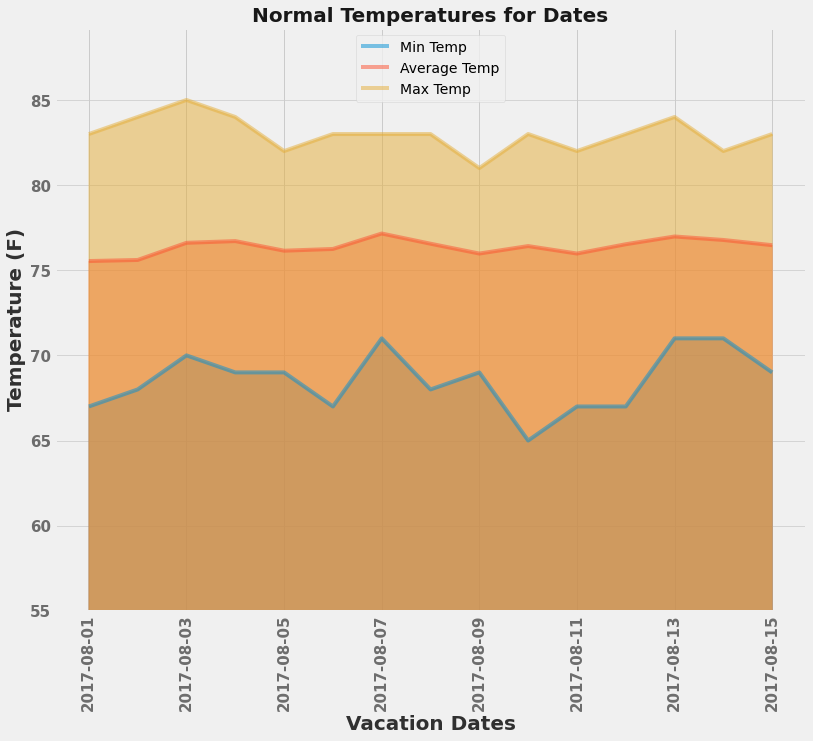

In [46]:
# Plot the daily normals as an area plot with `stacked=False`
normals_df.plot.area(stacked=False, figsize=(12, 10))

# Legend
plt.legend(('Min Temp', 'Average Temp', 'Max Temp'),loc='upper center')

# Labeling, tickers and grids
plt.grid(axis='y', alpha=0.75);
plt.xlabel('Vacation Dates',fontweight="bold", alpha=0.8, fontsize=20);
plt.ylabel('Temperature (F)',fontweight="bold", alpha=0.8, fontsize=20);
plt.xticks(fontsize=15, fontweight="bold", alpha=0.55, rotation=90);
plt.yticks(fontsize=15, fontweight="bold", alpha=0.55);
plt.title('Normal Temperatures for Dates',
          fontweight="bold", alpha=0.9, fontsize=20);
plt.ylim(bottom=min(normals_df["T Min"])-10)  


#Show the Plot
plt.show();